In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set beautiful plot style
plt.style.use('seaborn-v0_8')          
sns.set_palette("husl")

In [5]:
df = pd.read_csv('D:\CustomerSegmentation\Mall_Customers.csv')

In [6]:
# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Miss

<Figure size 1000x800 with 0 Axes>

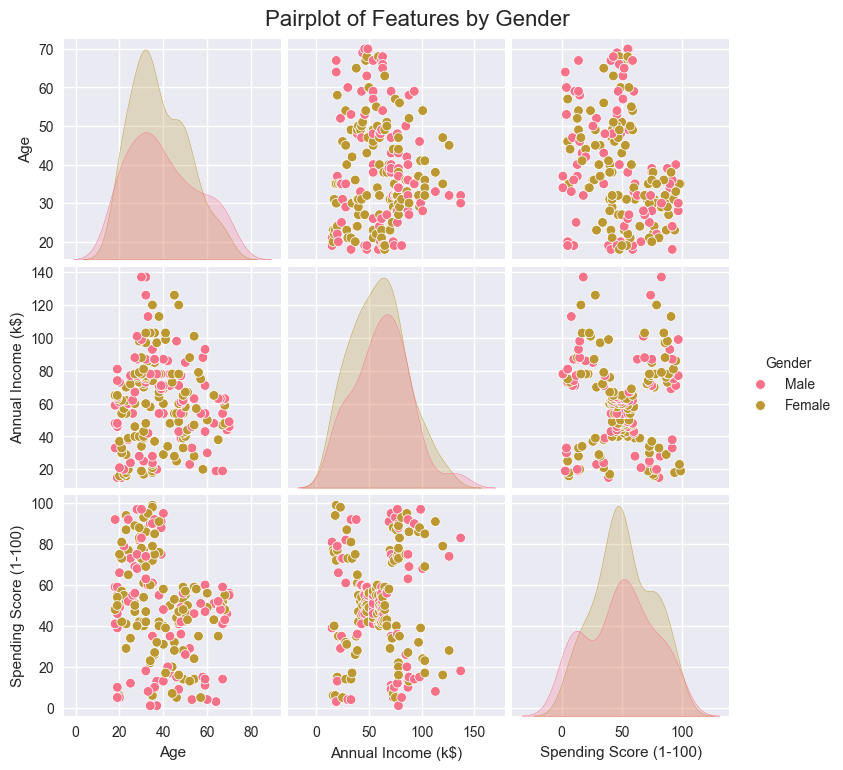

In [7]:
# 3. Exploratory Data Analysis (EDA) - Visualization
# 3.1 Pairplot to see relationships
plt.figure(figsize=(10,8))
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Features by Gender', y=1.02, fontsize=16)
plt.show()

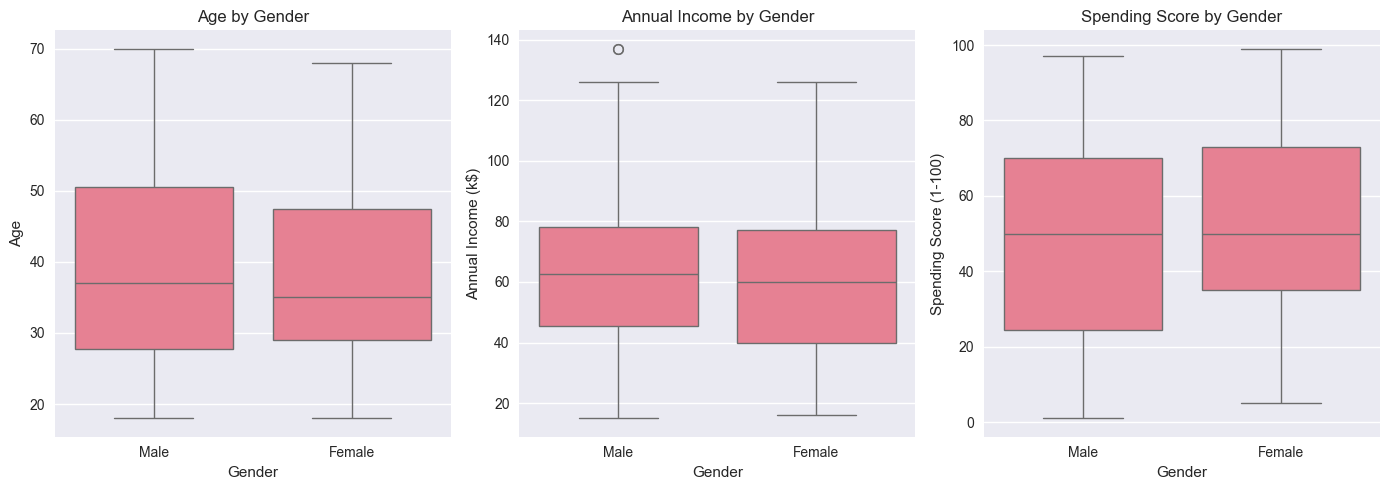

In [8]:
# 3.2 Box plots for numerical features
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age by Gender')

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Gender')

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')

plt.tight_layout()
plt.show()

In [9]:
# 4. Feature Selection & Preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [10]:
# Feature Scaling (K-Means distance-based भएकाले अनिवार्य)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled data sample (first 5 rows):")
print(X_scaled[:5])


Scaled data sample (first 5 rows):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [23]:
# 5. Find Optimal Number of Clusters → Elbow Method + Silhouette Score
# Reset lists to ensure they are empty
wcss = []
sil_scores = []

range_n_clusters = range(2, 11)  # From 2 to 10

print("\nCalculating WCSS and Silhouette Scores...")
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score (higher is better)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(score)
    print(f"For n_clusters = {n_clusters}, Silhouette Score = {score:.4f}, WCSS = {kmeans.inertia_:.2f}")


Calculating WCSS and Silhouette Scores...
For n_clusters = 2, Silhouette Score = 0.3973, WCSS = 273.67
For n_clusters = 3, Silhouette Score = 0.4666, WCSS = 157.70
For n_clusters = 4, Silhouette Score = 0.4943, WCSS = 109.23
For n_clusters = 5, Silhouette Score = 0.5547, WCSS = 65.57
For n_clusters = 6, Silhouette Score = 0.5138, WCSS = 60.13
For n_clusters = 7, Silhouette Score = 0.5020, WCSS = 49.67
For n_clusters = 8, Silhouette Score = 0.4550, WCSS = 37.32
For n_clusters = 9, Silhouette Score = 0.4567, WCSS = 32.50
For n_clusters = 10, Silhouette Score = 0.4448, WCSS = 30.06


In [24]:
# Debug: Ensure lengths match
print("\nDebug: Length of range_n_clusters:", len(range_n_clusters))
print("Length of wcss:", len(wcss))
print("Length of sil_scores:", len(sil_scores))
assert len(wcss) == len(range_n_clusters), "WCSS length mismatch!"
assert len(sil_scores) == len(range_n_clusters), "Silhouette scores length mismatch!"


Debug: Length of range_n_clusters: 9
Length of wcss: 9
Length of sil_scores: 9


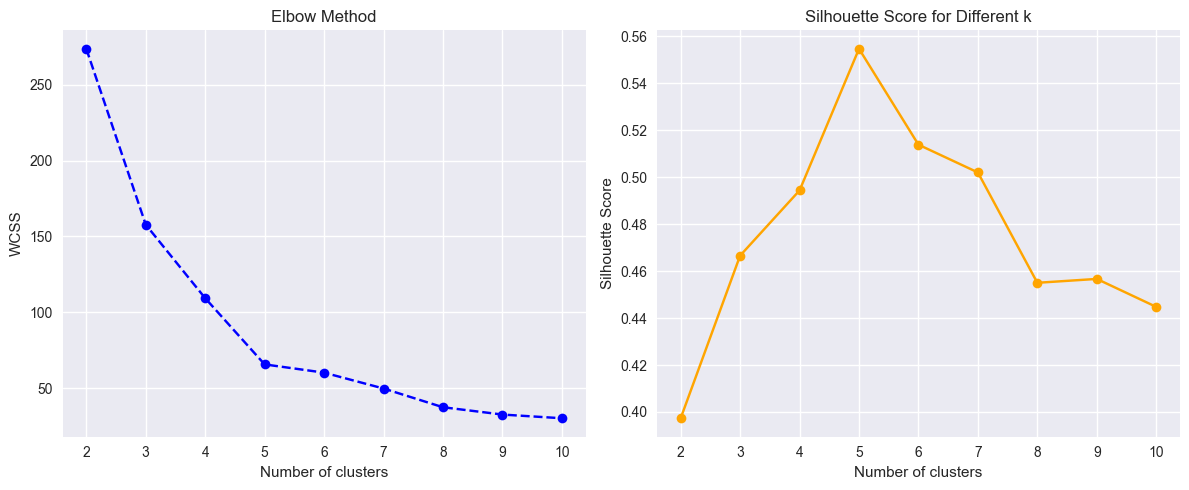

In [25]:
# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, sil_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [26]:
# 6. Apply Final K-Means Model
# Choose optimal_k based on plots (usually 5 for this dataset)
optimal_k = 5  # You can change based on your plot (e.g., elbow at 5, high silhouette)

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [27]:
# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans

In [28]:
# 7. Visualize the Clusters
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

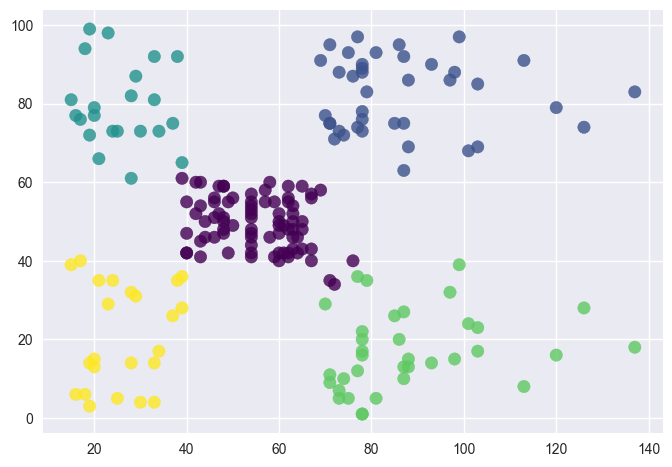

In [29]:
# Scatter plot with clusters
scatter = plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=80, alpha=0.8)

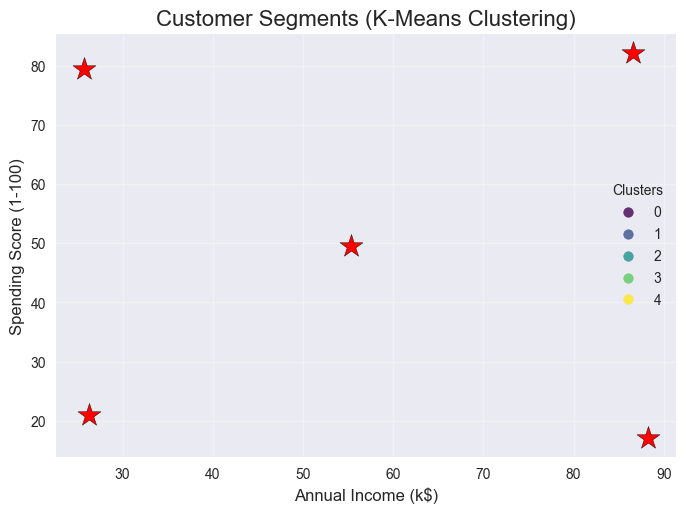

In [30]:
# Plot centroids (inverse transform to original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='red', marker='*', 
            edgecolor='black', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True, alpha=0.3)
plt.show()

In [31]:
# 8. Cluster Interpretation / Business Insights
print("\n=== Cluster Summary ===")
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).round(1)

cluster_summary.columns = ['Avg Age', 'Min Age', 'Max Age', 
                           'Avg Income (k$)', 'Avg Spending Score', 'Count']
print(cluster_summary)


=== Cluster Summary ===
         Avg Age  Min Age  Max Age  Avg Income (k$)  Avg Spending Score  Count
Cluster                                                                       
0           42.7       18       70             55.3                49.5     81
1           32.7       27       40             86.5                82.1     39
2           25.3       18       35             25.7                79.4     22
3           41.1       19       59             88.2                17.1     35
4           45.2       19       67             26.3                20.9     23


In [32]:
# Gender distribution per cluster
print("\nGender distribution per cluster (%):")
print(pd.crosstab(df['Cluster'], df['Gender'], normalize='index').round(3) * 100)


Gender distribution per cluster (%):
Gender   Female  Male
Cluster              
0          59.3  40.7
1          53.8  46.2
2          59.1  40.9
3          45.7  54.3
4          60.9  39.1


In [33]:
# 9. Save the result (optional)
df.to_csv('Mall_Customers_with_Clusters.csv', index=False)
print("\nClustered data saved as 'Mall_Customers_with_Clusters.csv'")


Clustered data saved as 'Mall_Customers_with_Clusters.csv'
